# Primeira regra de simpson: Regra do 1/3

#### Importar as bibliotecas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import plot
import numpy as np
import matplotlib.pyplot as plt

#### Definir a função

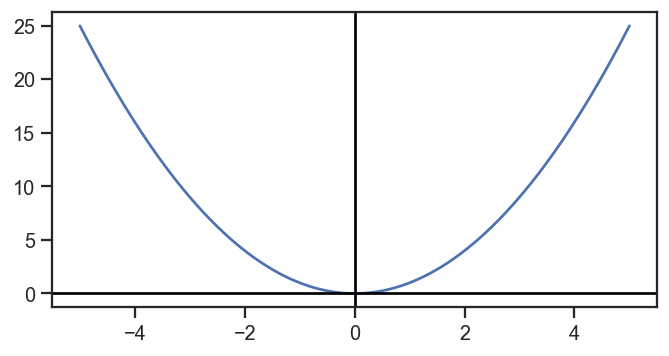

In [2]:
f = lambda x : x**2

xarr = np.linspace(-5,5,100)
yarr = f(xarr)
plot.plot(xarr,yarr)

#### Definir os limites

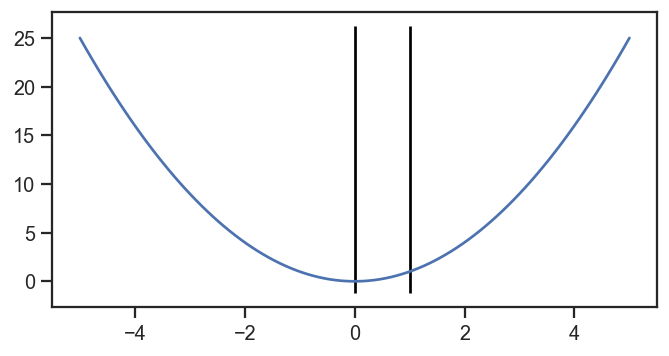

0.0 0.0
0.25 0.0625
0.5 0.25
0.75 0.5625
1.0 1.0


In [3]:
a = 0
b = 1

h = 0.25
xi = np.array([x for x in np.arange(a,b+h,h)])
yi = f(xi)

plot.plotrange(xarr,yarr,a,b)
for x,y in zip(xi,yi) : print(x,y)

### Método

Assumindo $A = \int_a^b f(x) dx$, podem ser criados vários polinômios de grau 2 para calcular uma estimativa da integral de uma função.

Assumindo que cada polinômio forma um quadrante da área total ($A_1,A_2,\cdots,A_m)$, cada uma das áreas $A_j$ são calculadas a partir de uma função interpolada entre os pontos $P_i$ e $P_{i+1}$ e $P_{i+2}$.

<img src="simpsons.png" style="width:40%"></img>

$A \approx A_1+A_2+\cdots+A_3$

A partir da fórmula da fórmula de diferenças finitas:

$h = x_{i+1}-x_i, \forall i \in \{0,1,\cdots,n-2\}$

$z = \frac{x-x_0}{h}$.

Aplicando substituição de variável na integral de x para z,

$zh = x-x_0$. Derivando em z:

$h \cdot dz = dx$.

Se $x=x_0$, $zh = x_0-x_0 \implies z = 0$.

Se $x=x_2$, $zh = x_2-x_0$. Pela definição das diferenças finitas, $x_2-x_0=2h \implies z = 2$.

Logo,

$A_j = \int_{x_0}^{x_2} f(x) dx$ transforma-se em $A \approx \int_{0}^{2} P^{(n)}_{(x)} h \cdot dz$,

Substituindo a função:

$A_j \approx \int_{0}^{2} [y_0 + z \cdot \Delta_{y_0}^{(1)} + \frac{z (z-1)}{2!} \Delta_{y_0}^{(2)}] h \cdot dz$.

Substituindo o operador de diferenças lineares e simplificando:

$A_j \approx h \int_{0}^{2} [y_0 + z \cdot (y_1-y_0) + \frac{1}{2} (z^2-z) \cdot (y_0-2y_1+y_2)] dz$.

Aplicando a integral:

$A_j \approx h [y_0 \cdot z + \frac{z^2}{2} \cdot (y_1-y_0) + \frac{1}{2} \cdot (y_0-2y_1+y_2) \cdot (\frac{z^3}{3}-\frac{z^2}{2})]_0^2$.

Aplicando os limites:

$A_j \approx h [2 y_0 + 2 \cdot (y_1-y_0) + \frac{1}{2} \cdot (y_0-2y_1+y_2) \cdot \frac{2}{3}]$

$A_j \approx h [2 y_0 + 2 y_1 - 2 y_0 + \frac{1}{3} y_0 - \frac{2}{3} y_1 + \frac{1}{3} y_2]$

$A_j \approx h [\frac{1}{3} y_0 - \frac{4}{3} y_1 + \frac{1}{3} y_2]$

$A_j \approx \frac{h}{3} [y_0 + 4 y_1 + y_2]$

Generalizando:

$$A \approx \frac{h}{3} [y_0 + 4y_1 + 2y_2 + 4y_3 + 2y_4 + \cdots + 2y_{n-2} + y_{n-1}]$$

Restrição: $n \geq 3 \ \& \ n \% 2 = 1$

In [4]:
window = np.array([1,4,1])
integral = (h/3)*sum(sum(window*yi[i:i+len(window)]) for i in range(0,len(yi)-len(window)+1,len(window)-1))

print(integral)

0.3333333333333333
